In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
df = pd.read_csv('Rainfall.csv')

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [10]:
df = df.drop(columns=["day", "sunshine"])

In [11]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,40.0,13.7


In [12]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
winddirection,1
windspeed,1


In [13]:
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [14]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
winddirection,0
windspeed,0


In [15]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df["rainfall"] = df["rainfall"].map({"yes": 1, "no": 0})

In [17]:
df["rainfall"]

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


In [18]:
sns.set(style="whitegrid")

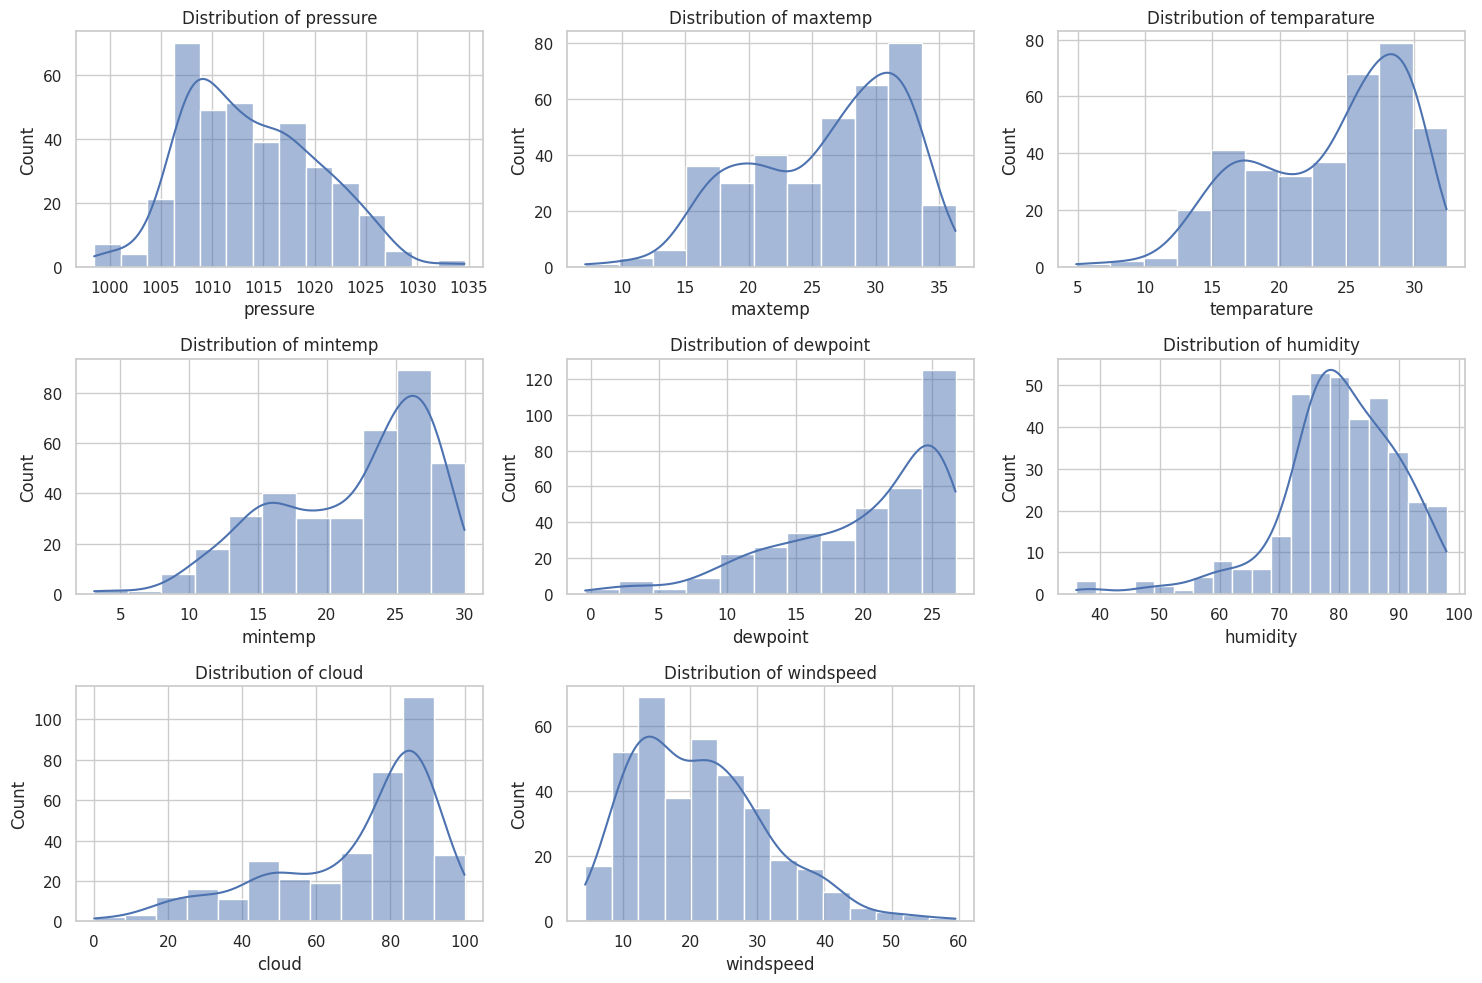

In [20]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

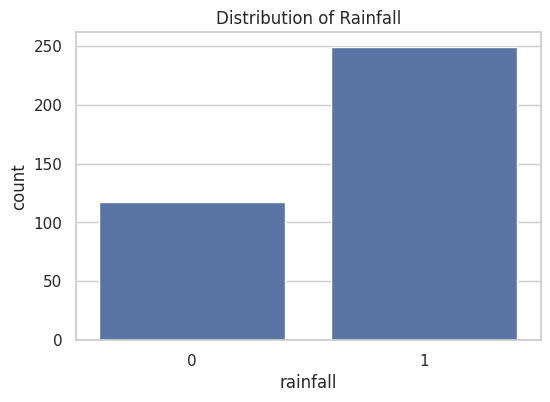

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=df)
plt.title("Distribution of Rainfall")
plt.show()

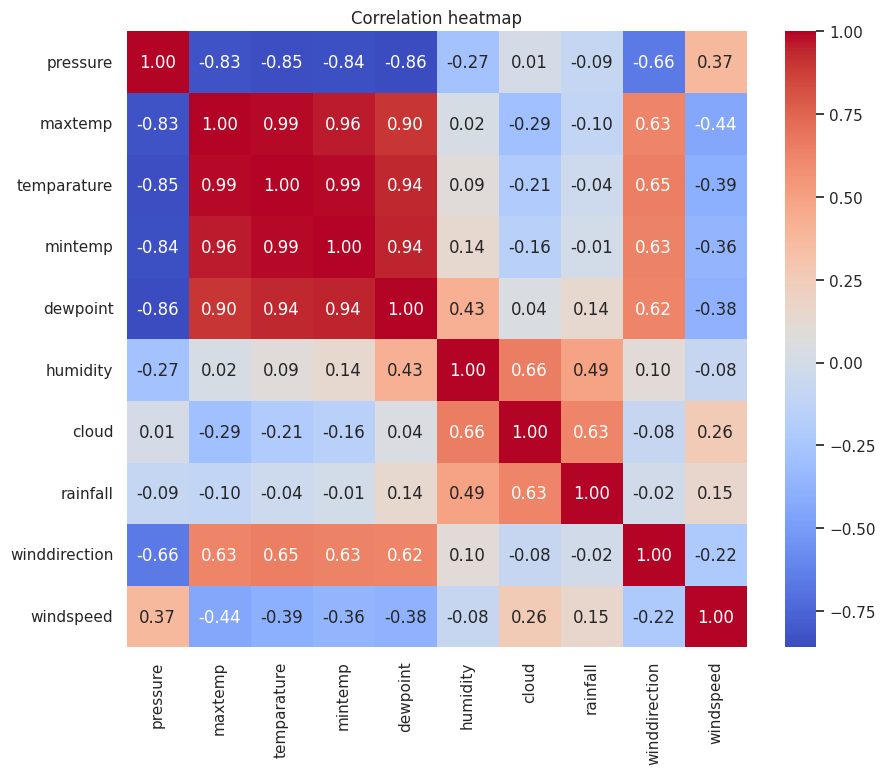

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

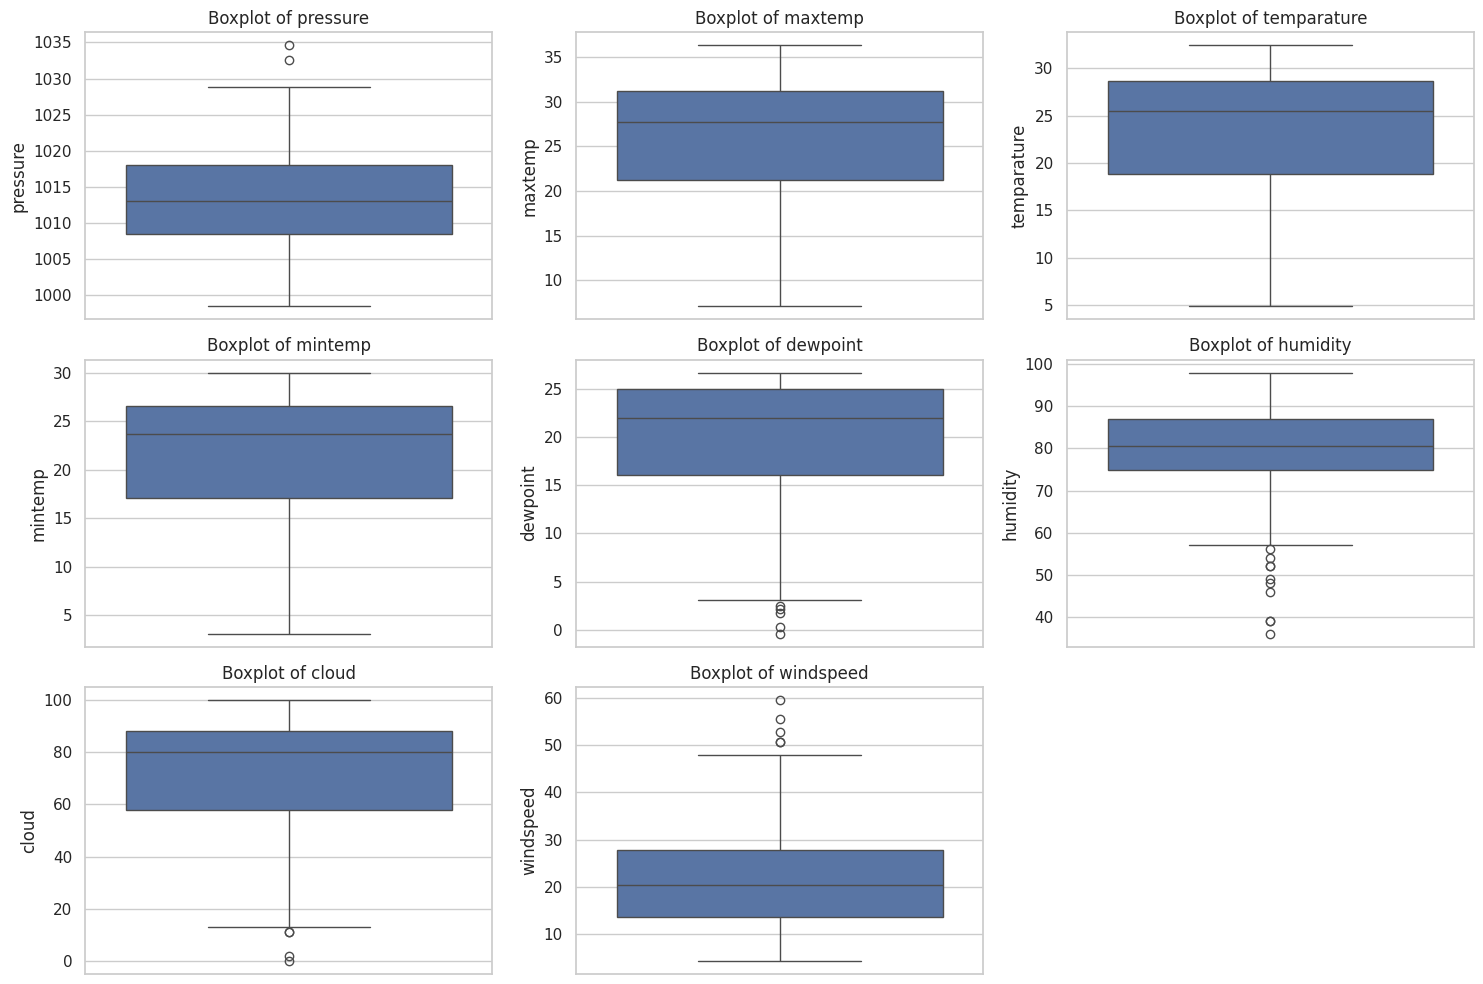

In [24]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [25]:
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [26]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,winddirection,windspeed
0,1025.9,13.1,72,49,1,80.0,26.3
1,1022.0,15.6,81,83,1,50.0,15.3
2,1019.7,18.4,95,91,1,40.0,14.2
3,1018.9,18.8,90,88,1,50.0,16.9
4,1015.9,19.9,95,81,1,40.0,13.7


In [27]:
X = df.drop(columns=["rainfall"])
y = df["rainfall"]

In [28]:
X

,pressure,dewpoint,humidity,cloud,winddirection,windspeed
0,1025.9,13.1,72,49,80.0,26.3
1,1022.0,15.6,81,83,50.0,15.3
2,1019.7,18.4,95,91,40.0,14.2
3,1018.9,18.8,90,88,50.0,16.9
4,1015.9,19.9,95,81,40.0,13.7
...,...,...,...,...,...,...
361,1022.7,15.0,84,90,30.0,18.4
362,1026.6,12.8,75,85,20.0,25.9
363,1025.9,13.3,75,78,70.0,33.4
364,1025.3,13.3,78,86,20.0,20.9


In [29]:
y

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


In [30]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [34]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

In [35]:
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy')

In [36]:
rf_best = rf_model.best_estimator_

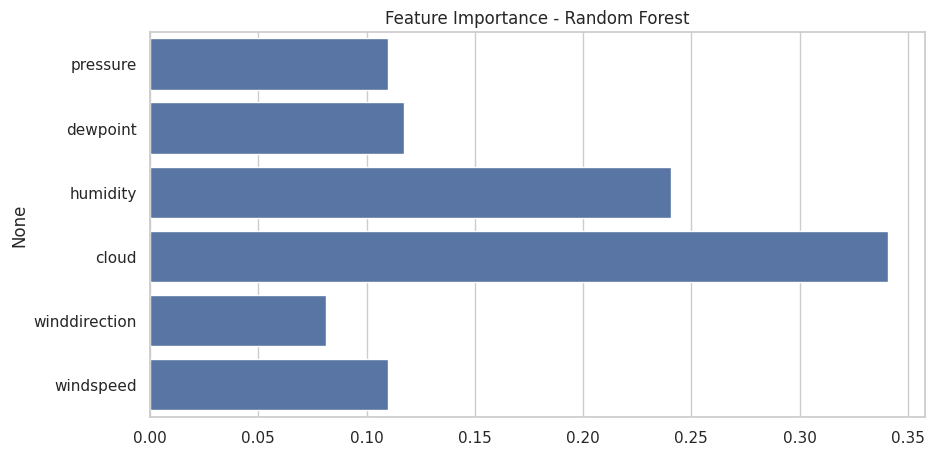

In [37]:
feature_importance = rf_best.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.show()

In [38]:
y_pred = rf_best.predict(X_test)

In [39]:
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy Score: 0.84
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85        60
           1       0.74      0.93      0.82        40

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.86      0.84      0.84       100



In [40]:
cm = confusion_matrix(y_test, y_pred)

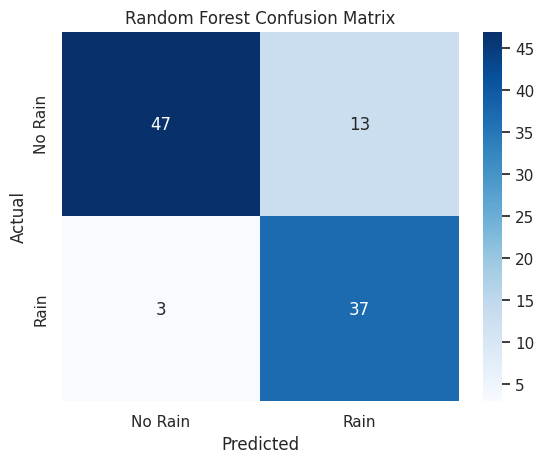

In [41]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [43]:
with open('rainfall_prediction_model.pkl', 'wb') as f:
    pickle.dump(rf_best, f)

In [44]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [45]:
def predict_rainfall(features):
    features = np.array(features).reshape(1, -1)  # Reshape input
    features = scaler.transform(features)  # Scale the input data
    prediction = rf_model.predict(features)
    return "Rain" if prediction[0] == 1 else "No Rain"

In [46]:
random_test_input = [1021, 15, 79, 56, 30, 21]
result = predict_rainfall(random_test_input)
print(f"Predicted Rainfall: {result}")

Predicted Rainfall: No Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
random_test_input =  [1013, 80, 12, 65, 8, 6]
result = predict_rainfall(random_test_input)
print(f"Predicted Rainfall: {result}")

Predicted Rainfall: Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
